In [1]:
import sys

print(sys.version)

3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 08:03:38) [Clang 14.0.6 ]


In [22]:
import yfinance as yf
import pandas as pd
import seaborn as sns 
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


sns.set_theme()

START_DATE = "2024-01-01"
END_DATE = "2025-10-24"

# Use a gold ticker instead of SPY. Common options:
# - COMEX Gold Futures: "GC=F"
# - SPDR Gold Shares ETF: "GLD"
# - Spot XAU/USD: "XAUUSD=X"
# Replace the ticker below with the one you prefer.

# Download daily price data for Gold (COMEX futures)
gold = yf.download("GC=F", start=START_DATE, end=END_DATE, auto_adjust=True)

# avoid elementwise addition of string to DataFrame (causes UFuncTypeError)
gold.head()

# Also download Silver (COMEX futures)
silver = yf.download("SI=F", start=START_DATE, end=END_DATE, auto_adjust=True)

silver.head()
silver.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SI=F,SI=F,SI=F,SI=F,SI=F
Date,,,,,
2025-10-17,49.863998,53.340000,49.645000,53.215000,400
2025-10-20,51.118999,51.430000,50.139999,50.415001,652
2025-10-21,47.450001,50.805000,47.415001,50.805000,329
2025-10-22,47.460999,48.115002,47.220001,47.889999,347
2025-10-23,48.481998,48.910000,48.459999,48.470001,347


In [23]:
new_columns = ['close', 'high', 'low', 'open', 'volume']

gold.columns = new_columns
silver.columns = new_columns

gold.head()
#silver.head()

,close,high,low,open,volume
Date,,,,,
2024-01-02,2064.399902,2073.699951,2057.100098,2063.500000,61
2024-01-03,2034.199951,2044.000000,2034.199951,2034.199951,54
2024-01-04,2042.300049,2044.500000,2038.000000,2041.599976,88
2024-01-05,2042.400024,2048.100098,2042.400024,2044.500000,12
2024-01-08,2026.599976,2033.699951,2019.099976,2019.099976,10


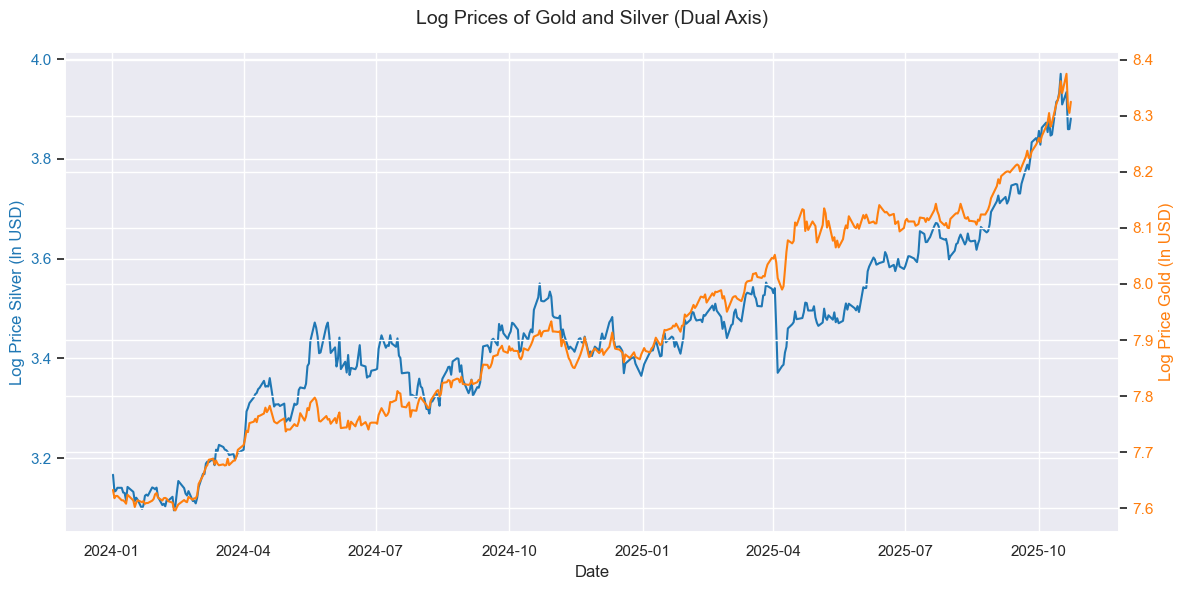

In [27]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe gauche → Silver
ax1.plot(gold.index, np.log(silver['close']), color='tab:blue', label='Silver')
ax1.set_xlabel("Date")
ax1.set_ylabel("Log Price Silver (ln USD)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Axe droit → Gold
ax2 = ax1.twinx()
ax2.plot(gold.index, np.log(gold['close']), color='tab:orange', label='Gold')
ax2.set_ylabel("Log Price Gold (ln USD)", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Titre + légende
fig.suptitle("Log Prices of Gold and Silver (Dual Axis)", fontsize=14)
fig.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

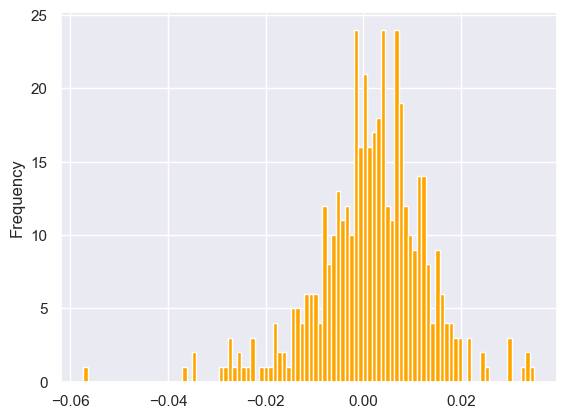

In [33]:
gold['returns'] = gold['close'].pct_change()

gold['returns'].plot(kind='hist', bins=100, color='orange')

<Axes: ylabel='Frequency'>

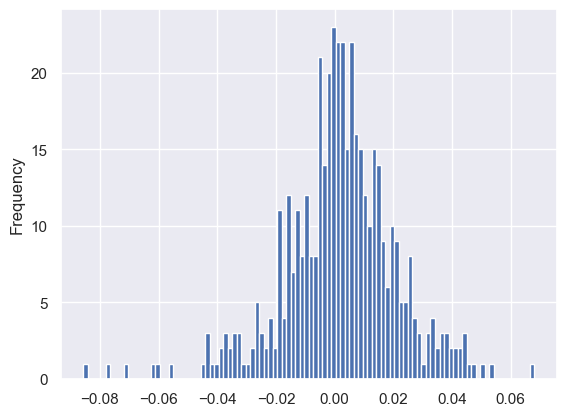

In [31]:
silver['returns'] = silver['close'].pct_change()
silver['returns'].plot(kind='hist', bins=100)

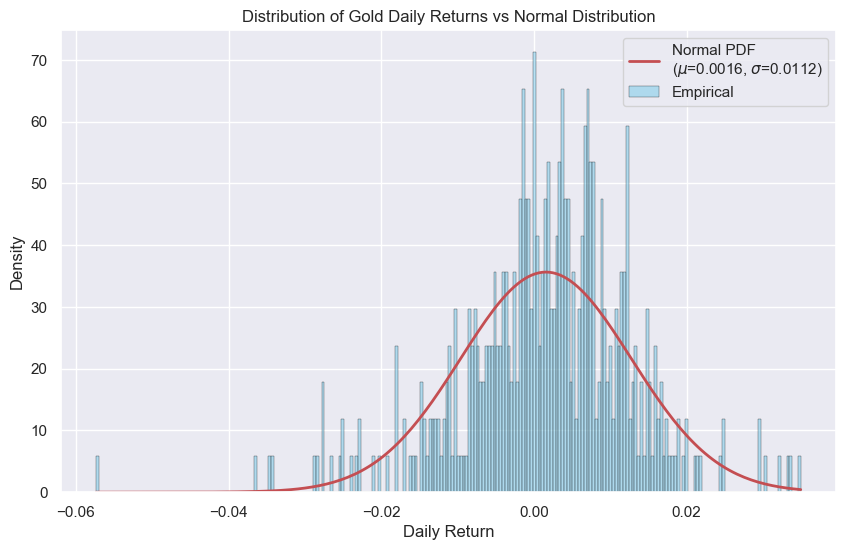

In [34]:
# Drop NA values from returns
returns_gold = gold["returns"].dropna()

# Estimate mean and std of returns
mu_gold, sigma_gold = returns_gold.mean(), returns_gold.std()

# Create a range of values for the normal PDF
x = np.linspace(returns_gold.min(), returns_gold.max(), 200)
pdf_gold = norm.pdf(x, mu_gold, sigma_gold)

# Plot histogram of returns with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(returns_gold, bins=250, stat="density", color="skyblue", edgecolor="black", alpha=0.6, label="Empirical")

# Plot the normal PDF
plt.plot(x, pdf_gold, 'r-', lw=2, label=f"Normal PDF\n($\\mu$={mu_gold:.4f}, $\\sigma$={sigma_gold:.4f})")

plt.title("Distribution of Gold Daily Returns vs Normal Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.show()

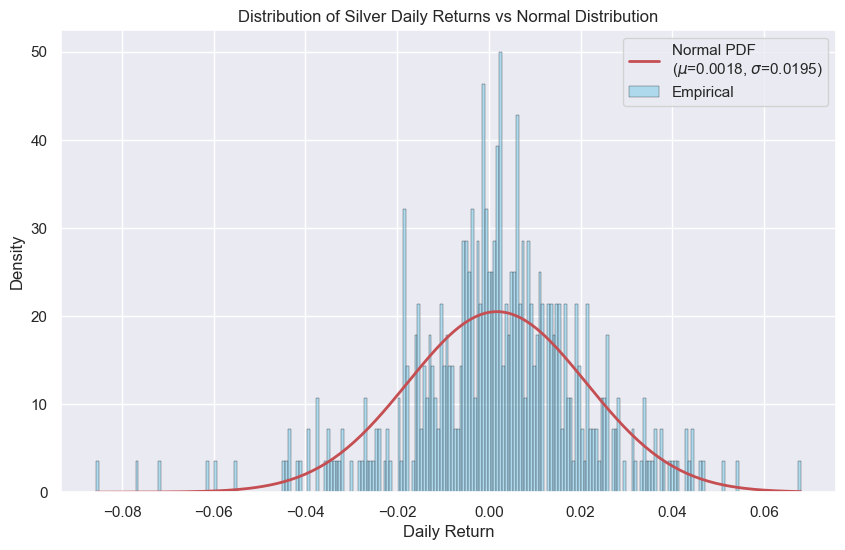

In [35]:
# Drop NA values from returns
returns_silver = silver["returns"].dropna()

# Estimate mean and std of returns
mu_silver, sigma_silver = returns_silver.mean(), returns_silver.std()

# Create a range of values for the normal PDF
x = np.linspace(returns_silver.min(), returns_silver.max(), 200)
pdf_silver = norm.pdf(x, mu_silver, sigma_silver)

# Plot histogram of returns with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(returns_silver, bins=250, stat="density", color="skyblue", edgecolor="black", alpha=0.6, label="Empirical")

# Plot the normal PDF
plt.plot(x, pdf_silver, 'r-', lw=2, label=f"Normal PDF\n($\\mu$={mu_silver:.4f}, $\\sigma$={sigma_silver:.4f})")

plt.title("Distribution of Silver Daily Returns vs Normal Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.show()

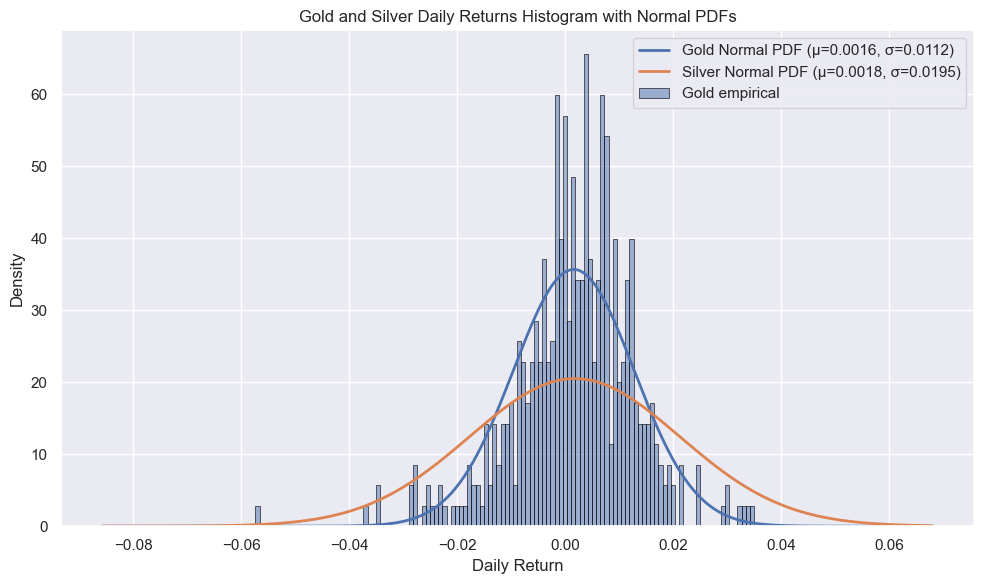

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# If your dataframes have 'Close' instead of 'close', change the keys accordingly.
# Compute returns
gold["returns"] = gold["close"].pct_change()
silver["returns"] = silver["close"].pct_change()

# Drop NA
gold_ret = gold["returns"].dropna()
silver_ret = silver["returns"].dropna()

# Sample mean/std
mu_gold, sigma_gold = gold_ret.mean(), gold_ret.std()
mu_silver,  sigma_silver  = silver_ret.mean(),  silver_ret.std()

# x-range covering BOTH series for a fair visual comparison
x_min = min(gold_ret.min(), silver_ret.min())
x_max = max(gold_ret.max(), silver_ret.max())
x = np.linspace(x_min, x_max, 400)

# Normal PDFs implied by sample moments
pdf_gold = norm.pdf(x, mu_gold, sigma_gold)
pdf_silver  = norm.pdf(x, mu_silver,  sigma_silver)

# Plot
sns.set_theme()
plt.figure(figsize=(10, 6))

# Histogram of Gold returns as density
sns.histplot(gold_ret, bins=120, stat="density", edgecolor="black", alpha=0.5, label="Gold empirical")

# Overlay PDFs
plt.plot(x, pdf_gold, linewidth=2, label=f"Gold Normal PDF (μ={mu_gold:.4f}, σ={sigma_gold:.4f})")
plt.plot(x, pdf_silver,  linewidth=2, label=f"Silver Normal PDF (μ={mu_silver:.4f}, σ={sigma_silver:.4f})")

plt.title("Gold and Silver Daily Returns Histogram with Normal PDFs")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

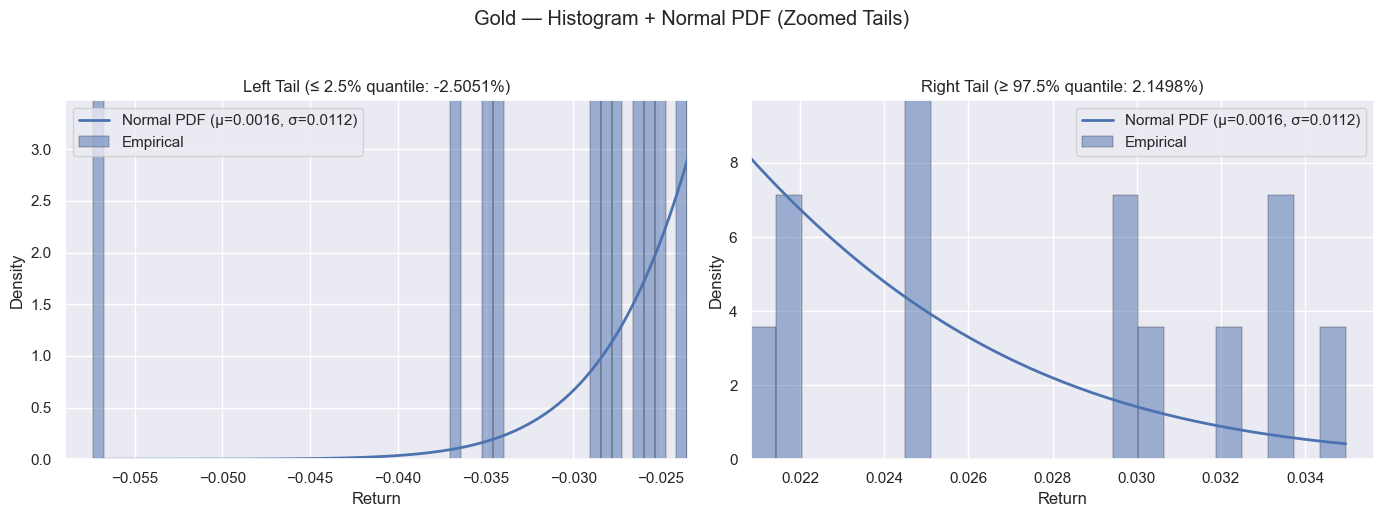

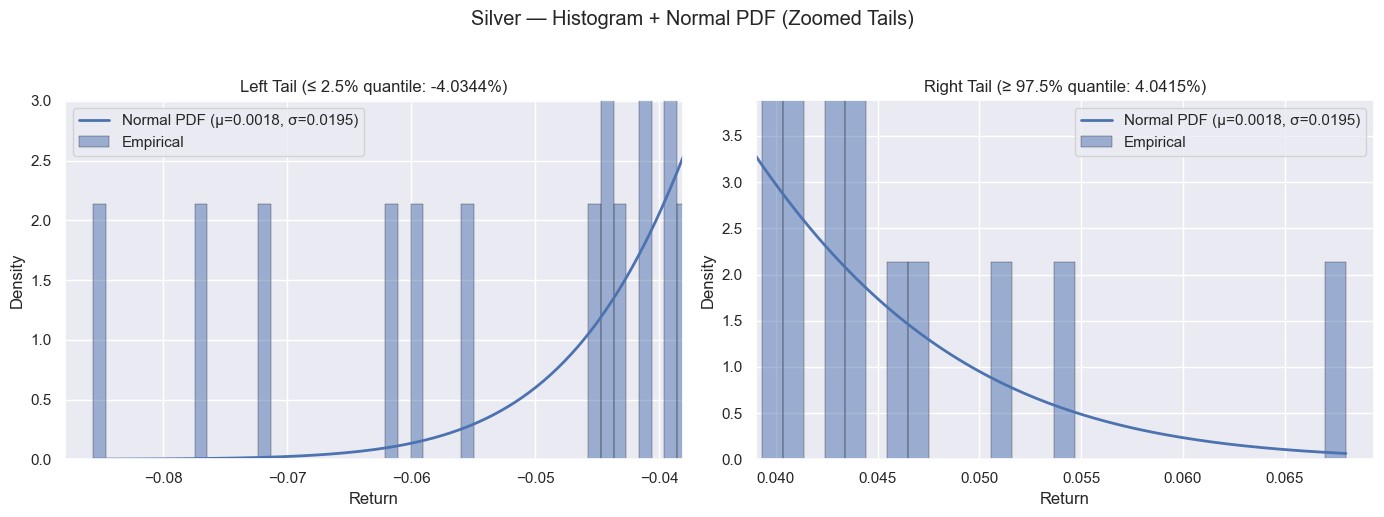

In [37]:
def _close_col(df):
    return "close" if "close" in df.columns else "Close"

def tail_zoom_hist_with_normal(df, label, tail_q=0.025, bins=120):
    # returns + moments
    r = df[_close_col(df)].pct_change().dropna()
    mu, sigma = r.mean(), r.std()

    # full-range x for the normal curve
    x = np.linspace(r.min(), r.max(), 800)
    pdf = norm.pdf(x, mu, sigma)

    # quantile cutoffs
    q_lo, q_hi = r.quantile(tail_q), r.quantile(1 - tail_q)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
    fig.suptitle(f"{label} — Histogram + Normal PDF (Zoomed Tails)", y=1.03)

    # --- Left tail zoom ---
    ax = axes[0]
    sns.histplot(r, bins=bins, stat="density", edgecolor="black", alpha=0.5, ax=ax, label="Empirical")
    ax.plot(x, pdf, linewidth=2, label=f"Normal PDF (μ={mu:.4f}, σ={sigma:.4f})")

    # zoom in on left tail
    margin = (q_lo - r.min()) * 0.05
    ax.set_xlim(r.min() - margin, q_lo + margin)

    # adjust ylim to max density in this region
    mask_left = (x >= r.min() - margin) & (x <= q_lo + margin)
    ymax_left = max(pdf[mask_left].max(), 1e-6) * 1.2
    ax.set_ylim(0, ymax_left)

    ax.set_title(f"Left Tail (≤ {tail_q:.1%} quantile: {q_lo:.4%})")
    ax.set_xlabel("Return")
    ax.set_ylabel("Density")
    ax.legend()

    # --- Right tail zoom ---
    ax = axes[1]
    sns.histplot(r, bins=bins, stat="density", edgecolor="black", alpha=0.5, ax=ax, label="Empirical")
    ax.plot(x, pdf, linewidth=2, label=f"Normal PDF (μ={mu:.4f}, σ={sigma:.4f})")

    # zoom in on right tail
    margin = (r.max() - q_hi) * 0.05
    ax.set_xlim(q_hi - margin, r.max() + margin)

    # adjust ylim to max density in this region
    mask_right = (x >= q_hi - margin) & (x <= r.max() + margin)
    ymax_right = max(pdf[mask_right].max(), 1e-6) * 1.2
    ax.set_ylim(0, ymax_right)

    ax.set_title(f"Right Tail (≥ {1 - tail_q:.1%} quantile: {q_hi:.4%})")
    ax.set_xlabel("Return")
    ax.set_ylabel("Density")
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
tail_zoom_hist_with_normal(gold, "Gold", tail_q=0.025, bins=150)
tail_zoom_hist_with_normal(silver, "Silver", tail_q=0.025, bins=150)

In [38]:
# Align daily returns, drop any rows with NA, then compute covariance
returns_aligned = pd.concat([gold['returns'], silver['returns']], axis=1)
returns_aligned.columns = ['gold', 'silver']
returns_aligned = returns_aligned.dropna()

cov_matrix = returns_aligned.cov()
cov_gold_silver = cov_matrix.loc['gold', 'silver']

print("Covariance matrix (daily returns):")
print(cov_matrix)
print(f"\nCovariance between gold and silver (daily returns): {cov_gold_silver:.8e}")

# optional: display correlation for context
print(f"Correlation between gold and silver: {returns_aligned.corr().loc['gold','silver']:.4f}")

Covariance matrix (daily returns):
            gold    silver
gold    0.000125  0.000153
silver  0.000153  0.000379

Covariance between gold and silver (daily returns): 1.53021417e-04
Correlation between gold and silver: 0.7024
